TRAFFIC NETWORK 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# EXPLORATION DATA ANALYSIS (EDA)

In [3]:
dataset = 'part-00165-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'  # Ganti dengan path ke file Anda

In [4]:
data = pd.read_csv(file_path)

In [5]:
data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,16.611755,16.611755,0.0,0.0,0.0,0.0,...,0.0,42.0,8.312817e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,54.0,6.0,64.0,30.566496,30.566496,0.0,0.0,0.0,0.0,...,0.0,54.0,8.331820e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-PSHACK_Flood
2,0.000000,54.0,6.0,64.0,2.133659,2.133659,0.0,0.0,0.0,0.0,...,0.0,54.0,8.333186e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-PSHACK_Flood
3,0.207018,15345.0,17.0,64.0,1645.927174,1645.927174,0.0,0.0,0.0,0.0,...,0.0,50.0,8.310203e+07,9.5,10.000000,0.0,0.0,0.0,141.55,DDoS-UDP_Flood
4,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.309434e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SYN_Flood


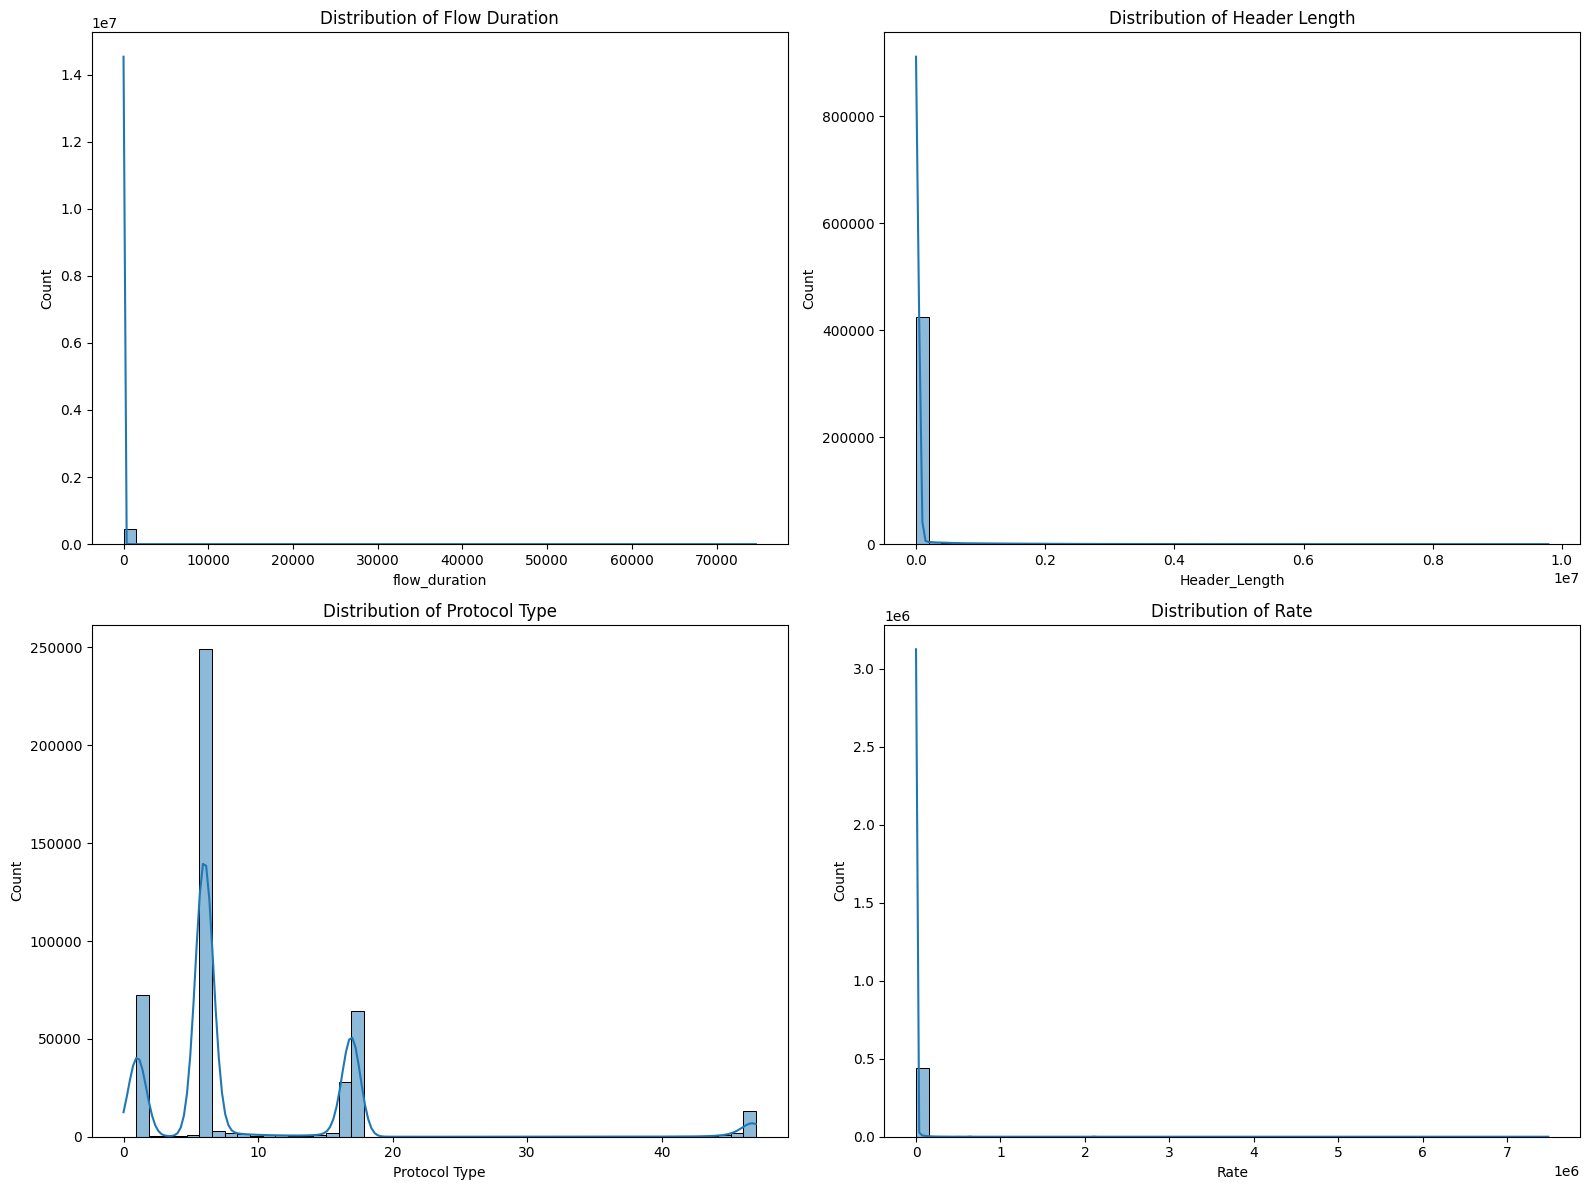

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot distribution of flow_duration
plt.subplot(2, 2, 1)
sns.histplot(data['flow_duration'], bins=50, kde=True)
plt.title('Distribution of Flow Duration')

# Plot distribution of Header_Length
plt.subplot(2, 2, 2)
sns.histplot(data['Header_Length'], bins=50, kde=True)
plt.title('Distribution of Header Length')

# Plot distribution of Protocol Type
plt.subplot(2, 2, 3)
sns.histplot(data['Protocol Type'], bins=50, kde=True)
plt.title('Distribution of Protocol Type')

# Plot distribution of Rate
plt.subplot(2, 2, 4)
sns.histplot(data['Rate'], bins=50, kde=True)
plt.title('Distribution of Rate')

plt.tight_layout()
plt.show()


Distribusi beberapa fitur penting menunjukkan karakteristik sebagai berikut:

Flow Duration: Banyak aliran memiliki durasi sangat singkat.

Header Length: Mayoritas paket memiliki panjang header standar.

Protocol Type: Ada variasi dalam jenis protokol yang digunakan, dengan beberapa protokol yang lebih sering digunakan.

Rate: Terdapat variasi dalam tingkat aliran data.

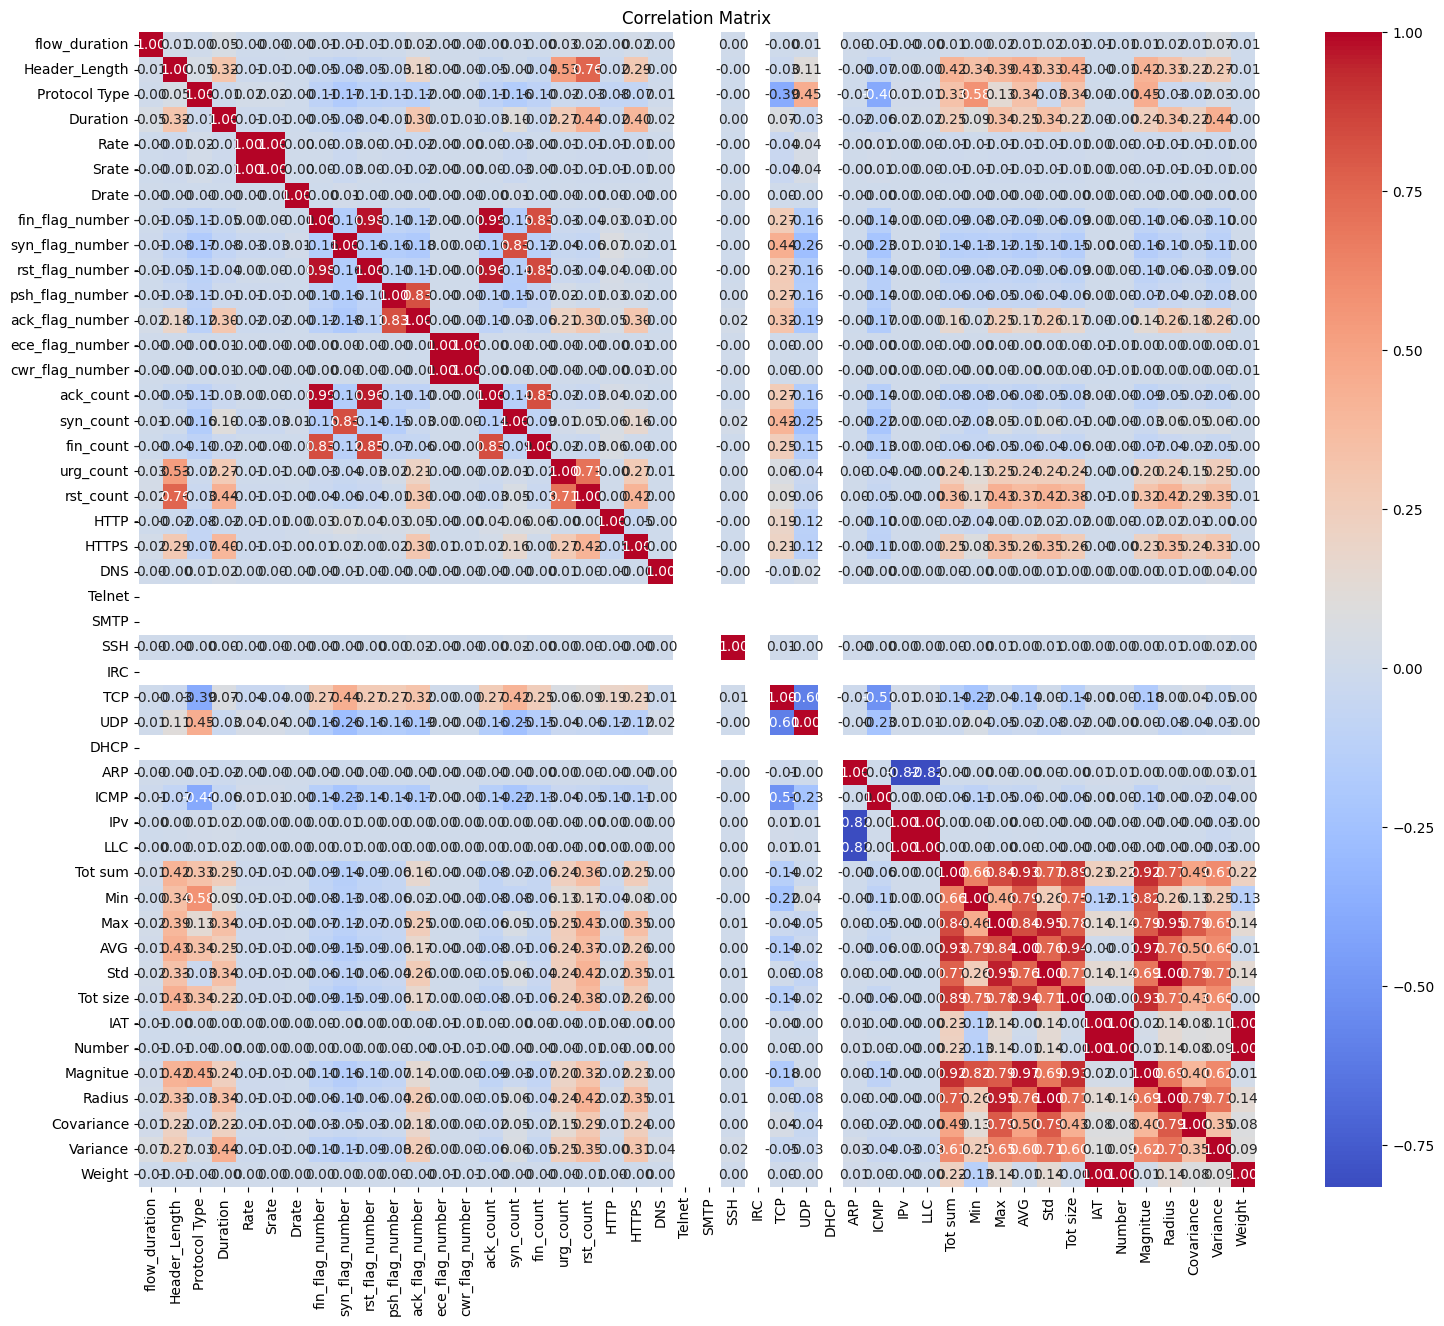

In [11]:
# Drop the label column for correlation matrix calculation
data_numeric = data.drop(columns=['label'])

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# PREPROCESSING DATA

In [12]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'label' column
data['label'] = label_encoder.fit_transform(data['label'])

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['label'])
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# BASELINE MODEL 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [20]:
# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9920908149948248
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      0.98      0.92      2104
           2       0.00      0.00      0.00         6
           3       1.00      0.08      0.15        12
           4       0.99      0.99      0.99       529
           5       1.00      0.88      0.93        56
           6       1.00      1.00      1.00     13756
           7       0.99      0.98      0.99       874
           8       1.00      1.00      1.00      7757
           9       1.00      1.00      1.00      7628
          10       1.00      1.00      1.00      7785
          11       0.88      0.98      0.93        45
          12       1.00      1.00      1.00      6853
          13       1.00      1.00      1.00      8569
          14       1.00      1.00      1.00     10286
          15       0.99      0.99      0.99       587
          16       0.72     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# MODEL

## ENSEMBLE MODEL

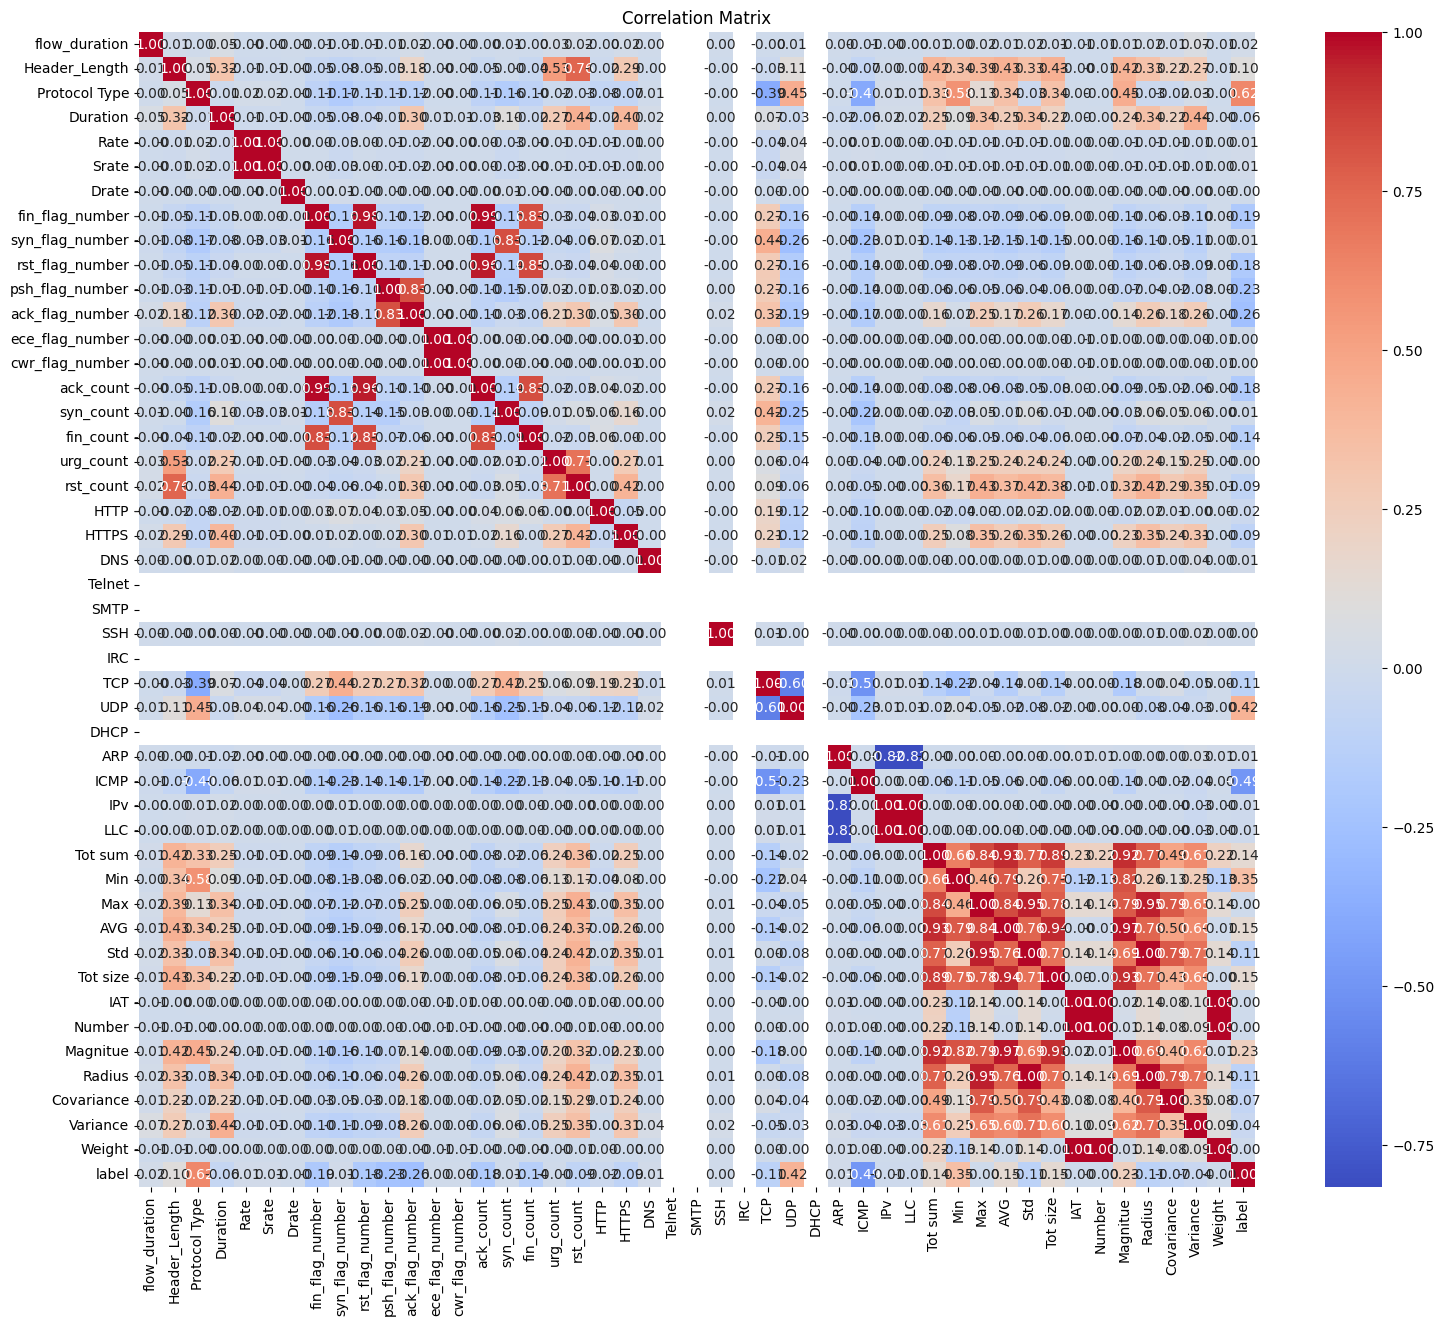

In [25]:
# Encode the label column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Select features with high correlation to the target
corr_target = abs(correlation_matrix["label"])
relevant_features = corr_target[corr_target > 0.1].index  # threshold can be adjusted
selected_data = data[relevant_features]

In [27]:
from sklearn.decomposition import PCA

# Separating features and target
X = selected_data.drop(columns=['label'])
y = selected_data['label']

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_pca = pca.fit_transform(X_scaled)


In [30]:
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_pca, y)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
model1 = RandomForestClassifier(**best_params, random_state=42)
model2 = GradientBoostingClassifier(random_state=42)
model3 = AdaBoostClassifier(random_state=42)

# Initialize the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('gb', model2),
    ('ab', model3)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_pca, y)

# Predict on test set and evaluate
y_pred = ensemble_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)


NameError: name 'best_params' is not defined